In [1]:
# ______________________________________________________________________________________________________________
# Cubic Spline Interpolation
# ______________________________________________________________________________________________________________
# In general form, Cubic Spline Interpolation takes N points: (x0,y0), (x1, y1), (x2, y2)
# and calculate N-1 functions S0(x), S1(x).. with the following form:
# si(x) = ai + bi(x-xi) + ci(x-xi)^2 + di(x-xi)^3, for x in rage [xi,yi]
# in the program we will calculate the coefficients = [ a0,a1,a2..., b0,b1,b2..., c0, c1,c2... , d0,d1,d2...]
# 
# ______________________________________________________________________________________________________________


# simple class to store points (x,y)
class Point:
    def __init__(self,x,y):
        self.x = float(x)
        self.y = float(y)

# receives array of points, and return cubic spline coefficients
def Spline(points):
    N   = len(points)-1
    h   =     [(points[i+1].x-points[i].x)      for i in range(N)]          # delta x
    b   =     [(points[i+1].y-points[i].y)/h[i] for i in range(N)]          # delta y / delta x
    ftt = [0]+[3*(b[i+1]-b[i])/(h[i+1]+h[i])    for i in range(N-1)]+[0]    # f''(x) = 0 for first and last element, for the rest: 3*(b(i+1)-bi)/(h(i+1)+hi)
    A   =     [(ftt[i+1]-ftt[i])/(6*h[i])       for i in range(N)]          # calc a0,a1,..
    B   =     [ftt[i]/2                         for i in range(N)]          # calc b0,b1...
    C   =     [b[i]-h[i]*(ftt[i+1]+2*ftt[i])/6  for i in range(N)]          # calc c0,c1...
    D   =     [points[i].y                      for i in range(N)]          # calc d0,d1...
    return A,B,C,D


# receives points and Spline coefficients and print the functions
def PrintSpline(points,A,B,C,D):
    for i in range(len(points)-1):
        func = '[' + str(points[i].x) + ',' + str(points[i+1].x) + '] f(x) = '
        components = []
        if A[i]:
            components.append(str(A[i])+'(x-'+str(points[i].x)+')^3')
        if B[i]:
            components.append(str(B[i])+'(x-'+str(points[i].x)+')^2')
        if C[i]:
            components.append(str(C[i])+'(x-'+str(points[i].x)+')')
        if D[i]:
            components.append(str(D[i]))
        if components:
            func += components[0]
            for i in range (1,len(components)):
                if components[i][0] == '-':
                    func += ' - '+components[i][1:]
                else:
                    func += ' + '+components[i]
            print(func)
        else:
            print(func+'0')


def run_example(points):
    print("points: ")
    points = [Point(x,y) for x,y in points]
    for point in points:
        print("(" + str(point.x) + "," + str(point.y) + ")", end = " ")
    print("")
    print("Cubic spline interpolation:")
    A,B,C,D = Spline(points)
    PrintSpline(points,A,B,C,D)
    print("")

# Example A
print("example A:")
run_example([(1,2),(2,3),(3,5)])

# Example B
print("example B:")
run_example([(1,0),(2,1),(3,0),(4,1),(5,0)])

example A:
points: 
(1.0,2.0) (2.0,3.0) (3.0,5.0) 
Cubic spline interpolation:
[1.0,2.0] f(x) = 0.25(x-1.0)^3 + 0.75(x-1.0) + 2.0
[2.0,3.0] f(x) = -0.25(x-2.0)^3 + 0.75(x-2.0)^2 + 1.5(x-2.0) + 3.0

example B:
points: 
(1.0,0.0) (2.0,1.0) (3.0,0.0) (4.0,1.0) (5.0,0.0) 
Cubic spline interpolation:
[1.0,2.0] f(x) = -0.5(x-1.0)^3 + 1.5(x-1.0)
[2.0,3.0] f(x) = 1.0(x-2.0)^3 - 1.5(x-2.0)^2 - 0.5(x-2.0) + 1.0
[3.0,4.0] f(x) = -1.0(x-3.0)^3 + 1.5(x-3.0)^2 + 0.5(x-3.0)
[4.0,5.0] f(x) = 0.5(x-4.0)^3 - 1.5(x-4.0)^2 + 1.0



In [2]:
import numpy as np
def f(x):
    return np.sin(np.pi*x/6)
run_example([(-1,f(-1)),(1,f(1)),(3,f(3)),(5,f(5))])

points: 
(-1.0,-0.49999999999999994) (1.0,0.49999999999999994) (3.0,1.0) (5.0,0.49999999999999994) 
Cubic spline interpolation:
[-1.0,1.0] f(x) = -0.015624999999999995(x--1.0)^3 + 0.5624999999999999(x--1.0) - 0.49999999999999994
[1.0,3.0] f(x) = -0.015625000000000003(x-1.0)^3 - 0.09374999999999997(x-1.0)^2 + 0.5(x-1.0) + 0.49999999999999994
[3.0,5.0] f(x) = 0.03125(x-3.0)^3 - 0.1875(x-3.0)^2 + 1.0



<function matplotlib.pyplot.show(close=None, block=None)>

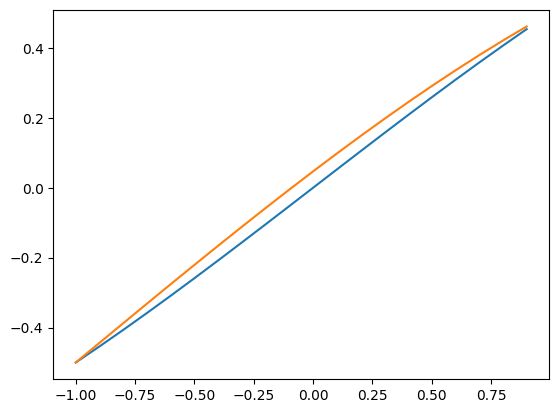

In [8]:
import matplotlib.pyplot as plt

x1 = np.arange(-1,1,0.1)
def f1(x):
    return -0.015624999999999995*(x + 1.0)**3 + 0.5624999999999999*(x + 1.0) - 0.49999999999999994

plt.plot(x1, f(x1))
plt.plot(x1, f1(x1))
plt.show